In [60]:
model.save?

In [61]:
model.save('shoe_cnn_model.h5')

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [63]:
class_names = ['QUALITY SHOE','DEFECTIVE SHOE']

In [64]:
# get referense to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500
raw_frames_type_1 = ()
raw_frames_type_2 = ()


while(True):
    
    #read new frame
    _, frame = camera.read()
    
    #flip frame
    frame = cv2.flip(frame, 1)
    
    #rescaling cam outout
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height)
    frame = cv2.resize(frame,(res,camera_height))
                    
    #add rectangle
    cv2.rectangle(frame,(300,75),(650,425),(240,100,0),2)
    
    #show the frame
    cv2.imshow('Capturing Frames',frame)
    
    key = cv2.waitKey(1)
    
                     
    #quit cam pressing by 'q'
    if key & 0xFF == ord('q'):
        break
    elif key & 0xFF == ('1'):
        #save the frame
        raw_frame_type_1.append(frame)
        print('1 key pressed = save Type1 frame')
    elif key & 0xFF == ('2'):
        #save the frame
        raw_frame_type_2.append(frame)
        print('2 key pressed = save Type2 frame')
                    
camera.release()
cv2.destroyAllWindows()
                    

In [65]:
save_width =399
save_height = 399

In [66]:
for i, frame in enumerate(raw_frames_type_1):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./Shoes/test/{}.jpg'.format(i), cv2,cvtColor(roi, cv2.COLOR_BGR2RGB))
    
    
for i, frame in enumerate(raw_frames_type_2):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./Damage_Shoes/test/{}.jpg'.format(i), cv2,cvtColor(roi, cv2.COLOR_BGR2RGB))

In [67]:
width =96
height =96

In [68]:
from glob import glob
from keras import preprocessing

#load images 1
Shoes = []
for image_path in glob('./Shoes/test/*.*'):
    image = preprocessing.image.load_img(image_path,
                                        target_size=(width,height))
    x = preprocessing.image.img_to_array(image)
    
    Shoes.append(x)
    
#load images 2
Damage_Shoes = []
for image_path in glob('./Damage_Shoes/test/*.*'):
    image = preprocessing.image.load_img(image_path,
                                        target_size=(width,height))
    x = preprocessing.image.img_to_array(image)
    
    Damage_Shoes.append(x)

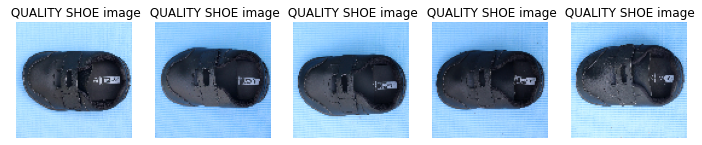

In [69]:
plt.figure(figsize=(12,8))

for i, x in enumerate(Shoes[:5]):
    plt.subplot(1,5, i+1)
    image = preprocessing.image.array_to_img(x)
    plt.imshow(image)
    
    plt.axis('off')
    plt.title(' {} image'.format(class_names[0]))
    
#show plot
plt.show()

In [70]:
Shoes[0]

array([[[175., 224., 255.],
        [183., 229., 255.],
        [167., 218., 255.],
        ...,
        [174., 221., 255.],
        [173., 225., 255.],
        [167., 218., 255.]],

       [[177., 225., 255.],
        [187., 230., 255.],
        [187., 232., 255.],
        ...,
        [190., 235., 255.],
        [189., 233., 255.],
        [181., 226., 255.]],

       [[180., 228., 255.],
        [178., 226., 255.],
        [178., 226., 255.],
        ...,
        [177., 226., 255.],
        [172., 224., 255.],
        [160., 213., 255.]],

       ...,

       [[158., 211., 255.],
        [157., 210., 255.],
        [165., 215., 255.],
        ...,
        [179., 222., 255.],
        [178., 223., 255.],
        [168., 216., 255.]],

       [[180., 223., 255.],
        [181., 225., 255.],
        [185., 227., 255.],
        ...,
        [166., 214., 255.],
        [171., 217., 255.],
        [155., 208., 255.]],

       [[168., 216., 255.],
        [158., 209., 255.],
        [174., 2

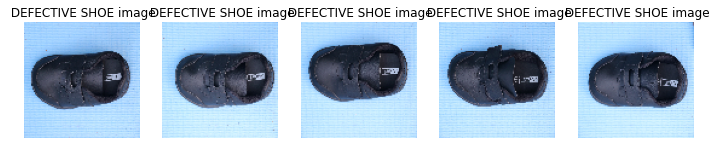

In [71]:
plt.figure(figsize=(12,8))

for i, x in enumerate(Damage_Shoes[:5]):
    plt.subplot(1,5, i+1)
    image = preprocessing.image.array_to_img(x)
    plt.imshow(image)
    
    plt.axis('off')
    plt.title(' {} image'.format(class_names[1]))
    
#show plot
plt.show()

In [72]:
Damage_Shoes[0]

array([[[174., 216., 255.],
        [173., 215., 255.],
        [172., 215., 255.],
        ...,
        [168., 213., 255.],
        [170., 213., 255.],
        [160., 206., 255.]],

       [[160., 208., 255.],
        [155., 205., 254.],
        [171., 216., 255.],
        ...,
        [144., 191., 243.],
        [140., 193., 245.],
        [136., 191., 247.]],

       [[168., 212., 255.],
        [153., 204., 255.],
        [162., 210., 255.],
        ...,
        [167., 211., 255.],
        [177., 219., 255.],
        [175., 217., 255.]],

       ...,

       [[165., 203., 252.],
        [158., 205., 255.],
        [153., 203., 254.],
        ...,
        [194., 228., 255.],
        [189., 224., 254.],
        [191., 228., 255.]],

       [[168., 212., 255.],
        [178., 217., 255.],
        [183., 221., 255.],
        ...,
        [188., 222., 255.],
        [170., 213., 255.],
        [170., 215., 255.]],

       [[158., 202., 247.],
        [171., 212., 255.],
        [168., 2

In [73]:
shoeX_type_1 = np.array(Shoes)
shoeX_type_2 = np.array(Damage_Shoes)

print(shoeX_type_1.shape)
print(shoeX_type_2.shape)

(39, 96, 96, 3)
(7, 96, 96, 3)


In [74]:
x = np.concatenate((shoeX_type_1, shoeX_type_2), axis=0)

#scale data to[0,1] values
x = x / 255.

x.shape

(46, 96, 96, 3)

In [75]:
from keras.utils import to_categorical

shoeY_type_1 = [0 for item in enumerate(shoeX_type_1)]

shoeY_type_2 = [1 for item in enumerate(shoeX_type_2)]

y = np.concatenate((shoeY_type_1, shoeY_type_2),axis=0)

y = to_categorical(y, num_classes=len(class_names))

print(y.shape)
print(y)

(46, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [76]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import Adam

#default para
conv_1=16
conv_1_drop = 0.2
conv_2 = 32
conv_2_drop =0.2
dense_1_n = 1024
dense_1_drop = 0.2
dense_2_n =512
dense_2_drop = 0.2
lr = 0.001

epochs =30
batch_size = 32
color_channels = 3

def build_model(conv_1_drop=conv_1_drop,conv_2_drop=conv_2_drop,
               dense_1_n=dense_1_n, dense_1_drop=dense_1_drop,
               dense_2_n=dense_2_n, dense_2_drop=dense_2_drop,
               lr=lr):
    model = Sequential()
    
    model.add(Convolution2D(conv_1,(3,3),
                           input_shape=(width,height,color_channels),
                           activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(conv_1_drop))
    
    model.add(Convolution2D(conv_2,(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(conv_2_drop))
    
    model.add(Flatten())
    
    model.add(Dense(dense_1_n, activation='relu'))
    model.add(Dropout(dense_1_drop))
    
    
    model.add(Dense(dense_2_n, activation='relu'))
    model.add(Dropout(dense_2_drop))
    
    model.add(Dense(len(class_names), activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                 optimizer=Adam(lr=lr),
                 metrics=['accuracy'])
    
    return model

In [77]:
import numpy as np
np.random.seed(1) #reproducibility

#model with base para
model = build_model()

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15488)            

In [78]:
x

array([[[[0.6862745 , 0.8784314 , 1.        ],
         [0.7176471 , 0.8980392 , 1.        ],
         [0.654902  , 0.85490197, 1.        ],
         ...,
         [0.68235296, 0.8666667 , 1.        ],
         [0.6784314 , 0.88235295, 1.        ],
         [0.654902  , 0.85490197, 1.        ]],

        [[0.69411767, 0.88235295, 1.        ],
         [0.73333335, 0.9019608 , 1.        ],
         [0.73333335, 0.9098039 , 1.        ],
         ...,
         [0.74509805, 0.92156863, 1.        ],
         [0.7411765 , 0.9137255 , 1.        ],
         [0.70980394, 0.8862745 , 1.        ]],

        [[0.7058824 , 0.89411765, 1.        ],
         [0.69803923, 0.8862745 , 1.        ],
         [0.69803923, 0.8862745 , 1.        ],
         ...,
         [0.69411767, 0.8862745 , 1.        ],
         [0.6745098 , 0.8784314 , 1.        ],
         [0.627451  , 0.8352941 , 1.        ]],

        ...,

        [[0.61960787, 0.827451  , 1.        ],
         [0.6156863 , 0.8235294 , 1.        ]

In [79]:
model.save_weights('Shoes weights.h5')

In [80]:
model.fit(x, y, epochs=epochs)

Epoch 1/30
2/2 [==============================] - 1s 140ms/step - loss: 1.3016 - accuracy: 0.4230
Epoch 2/30
2/2 [==============================] - 0s 161ms/step - loss: 1.9530 - accuracy: 0.8569
Epoch 3/30
2/2 [==============================] - 0s 104ms/step - loss: 1.9074 - accuracy: 0.2550
Epoch 4/30
2/2 [==============================] - 0s 111ms/step - loss: 0.6457 - accuracy: 0.8465
Epoch 5/30
2/2 [==============================] - 0s 109ms/step - loss: 0.9199 - accuracy: 0.8361
Epoch 6/30
2/2 [==============================] - 0s 109ms/step - loss: 0.5937 - accuracy: 0.8465
Epoch 7/30
2/2 [==============================] - 0s 102ms/step - loss: 0.4670 - accuracy: 0.8465
Epoch 8/30
2/2 [==============================] - 0s 121ms/step - loss: 0.4790 - accuracy: 0.8361
Epoch 9/30
2/2 [==============================] - 0s 123ms/step - loss: 0.4985 - accuracy: 0.8361
Epoch 10/30
2/2 [==============================] - 0s 125ms/step - loss: 0.4596 - accuracy: 0.8465
Epoch 11/30
2/2 [==

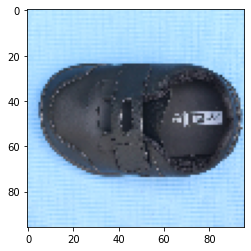

'QUALITY SHOE'

In [81]:
#predict using model

Shoes = preprocessing.image.load_img('./Shoes/test/1K8A8941.jpg',
                                     target_size=(width,height))

plt.imshow(Shoes)
plt.show()

shoeX_type_1 = np.expand_dims(Shoes, axis=0)

predictions = model.predict(shoeX_type_1)

class_names[np.argmax(predictions)]

In [82]:
predictions

array([[1., 0.]], dtype=float32)

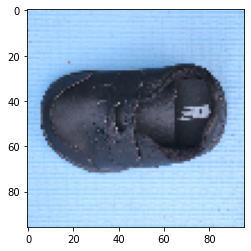

'DEFECTIVE SHOE'

In [83]:
#predict using model

Damage_Shoes = preprocessing.image.load_img('./Damage_Shoes/test/1K8A8984.jpg',
                                     target_size=(width,height))

plt.imshow(Damage_Shoes)
plt.show()

shoeX_type_2 = np.expand_dims(Damage_Shoes , axis=0)

predictions = model.predict(shoeX_type_2)

class_names[np.argmax(predictions)]

In [84]:
import time

camera = cv2.VideoCapture(0)
camera_height = 500

while(True):
    
    #read new frame
    _, frame = camera.read()
    
    #flip frame
    frame = cv2.flip(frame, 1)
    
    #rescaling cam outout
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height)
    frame = cv2.resize(frame,(res,camera_height))
                    
    #add rectangle
    cv2.rectangle(frame,(300,75),(650,425),(240,100,0),2)
    
    shoetype_1_pred, shoetype_2_pred = predictions[0]
    
    #add text
    shoetype_1_text ='{}: {}%'.format(class_names[0], int(shoetype_1_pred*100))
    cv2.putText(frame, shoetype_1_text,(70,170),
               cv2.FONT_HERSHEY_SIMPLEX, 0.6,(240,240,240),2)
    
    #add text
    shoetype_2_text ='{}: {}%'.format(class_names[1], int(shoetype_2_pred*100))
    cv2.putText(frame, shoetype_2_text,(70,200),
               cv2.FONT_HERSHEY_SIMPLEX, 0.6,(240,240,240),2)
    
    #show frame
    cv2.imshow("Scanning", frame)
    
    key = cv2.waitKey(1)
    
                       
    #quit cam pressing by 'q'
    if key & 0xFF == ord('q'):
        break
        
                    
camera.release()
cv2.destroyAllWindows()
            
    

In [53]:
model.save?


In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)            